In [6]:
words = open("names.txt", "r").read().splitlines()

In [7]:
len(words)

32033

In [ ]:
mappings = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        mappings[bigram] = mappings.get(bigram, 0) + 1

In [9]:
sorted(mappings.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
import torch

In [14]:
# a to z
chars = sorted(set(''.join(words)))
s_to_i = {s: i for i, s in enumerate(chars)}
s_to_i["<S>"] = 26
s_to_i["<E>"] = 27

In [15]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [ ]:
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        index_1 = s_to_i[ch1]
        index_2 = s_to_i[ch2]

        N[index_1, index_2] += 1


In [34]:
i_to_s = {i: s for s, i in s_to_i.items()}
i_to_s[27]

'<E>'

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

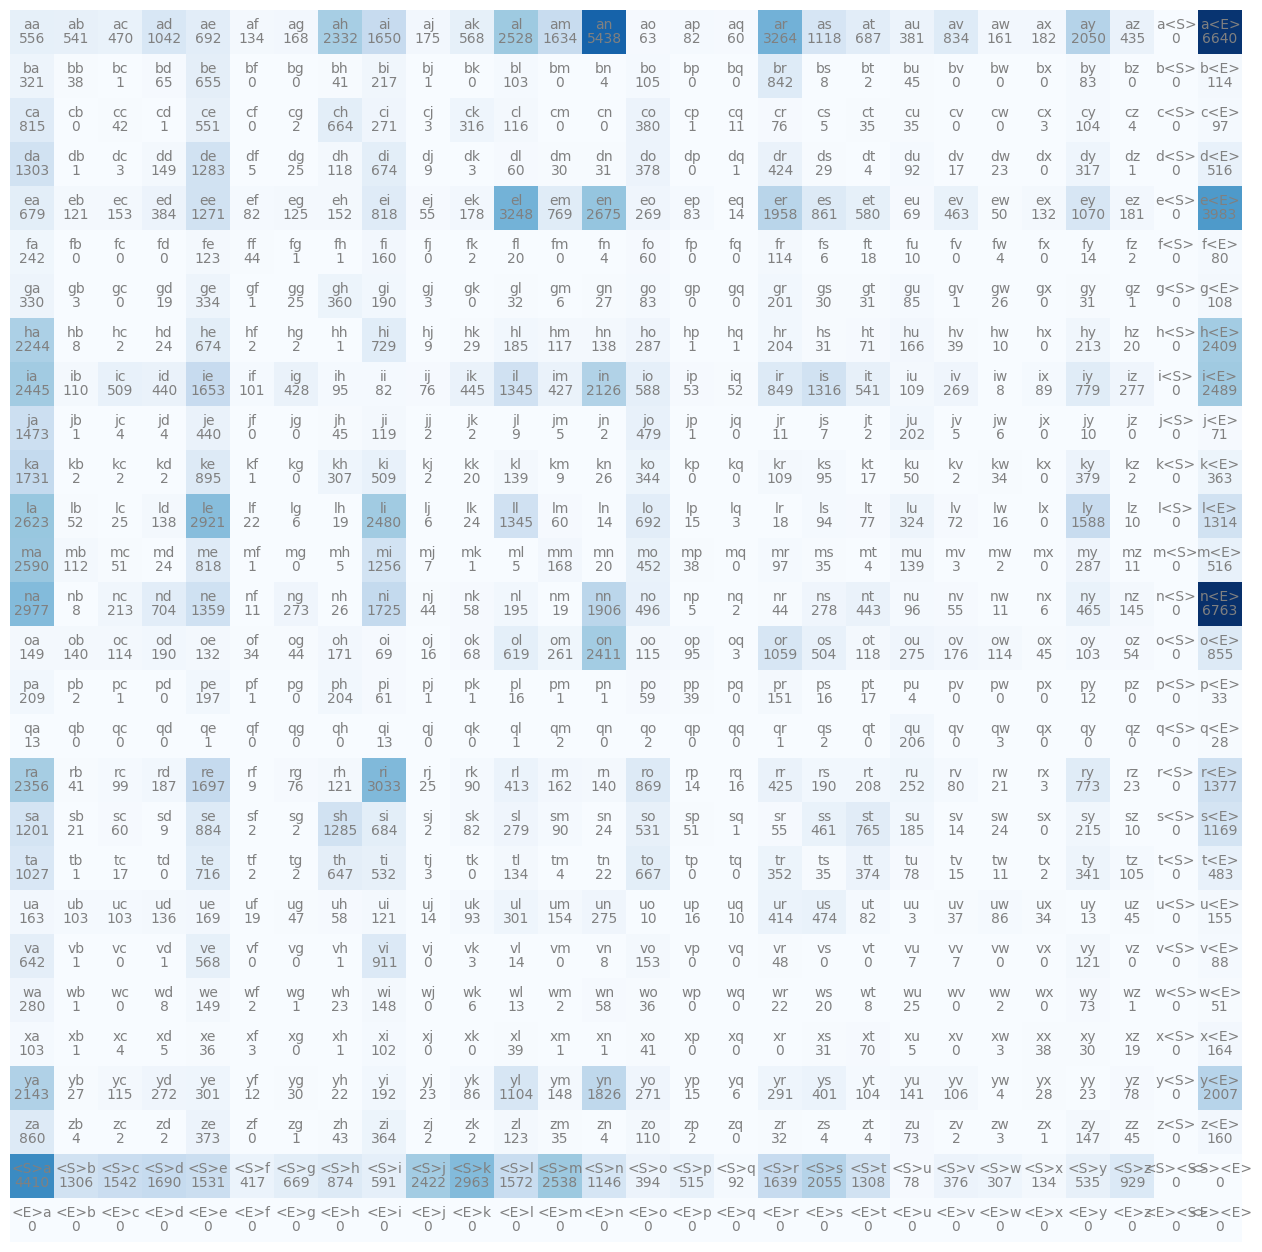

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(28):
    for j in range(28):
        ch_str = i_to_s[i] + i_to_s[j]
        plt.text(j, i, ch_str, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off")